# PLATAFORMA NEXFLIX

## Autor: Smit Jonatan Villafranca Romero

In [1]:
pip install missingno

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate
import missingno as msno
import math as math

# Directorio
# =============================================================================
import os   
import sys


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Carga de la data

In [4]:
# Direccionamos nuestra ruta de trabajo
# ==============================================================================
Ruta="D:/Examenes de Postulación/Delfosti/Desarrollo/0. Base Inicial"
os.chdir(Ruta)
os.getcwd()

'D:\\Examenes de Postulación\\Delfosti\\Desarrollo\\0. Base Inicial'

In [5]:
# Declaramos los nombres de los archivos a importar
# ==============================================================================
Archivo="netflix_titles.csv"

# Leemos los archivos CSV y lo colocamos en un DataFrame
# ==============================================================================
df=pd.read_csv(Archivo,              #ruta del archivo
               sep=',',              #separador de atributo que usa el fichero csv
               encoding='latin-1')   #Codificamos con "latin-1"

In [6]:
# Mostramos la data
# ==============================================================================
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Mostramos la informacion de la data set
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Revisar las categorias que tienen las variables categóricas
#### 1. Variable type

In [8]:
# Categorias de la variable type
# ==============================================================================
cat_type=len(df['type'].unique())
print(f"Netflix cuenta con {cat_type} categorias de entretenimiento y estos son: ")
type_unicos=df['type'].unique()
j=0
for i in type_unicos:
    j=j+1
    print(f"      type [{j}] :",i)

Netflix cuenta con 2 categorias de entretenimiento y estos son: 
      type [1] : Movie
      type [2] : TV Show


In [9]:
# Distribución de la variable type
# ==============================================================================
round((df['type'].value_counts()/len(df['type']))*100,2)

type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64

#### 2. Variable title

In [10]:
# Categorias de la variable title
# ==============================================================================
cat_title=len(df['title'].unique())
print(f"Netflix cuenta con {cat_title} películas o programas de televisión disponibles en su plataforma y estos son: ")
title_unicos=df['title'].unique()
j=0
for i in title_unicos:
    j=j+1
    print(f"      title [{j}] :",i)

Netflix cuenta con 8807 películas o programas de televisión disponibles en su plataforma y estos son: 
      title [1] : Dick Johnson Is Dead
      title [2] : Blood & Water
      title [3] : Ganglands
      title [4] : Jailbirds New Orleans
      title [5] : Kota Factory
      title [6] : Midnight Mass
      title [7] : My Little Pony: A New Generation
      title [8] : Sankofa
      title [9] : The Great British Baking Show
      title [10] : The Starling
      title [11] : Vendetta: Truth, Lies and The Mafia
      title [12] : Bangkok Breaking
      title [13] : Je Suis Karl
      title [14] : Confessions of an Invisible Girl
      title [15] : Crime Stories: India Detectives
      title [16] : Dear White People
      title [17] : Europe's Most Dangerous Man: Otto Skorzeny in Spain
      title [18] : Falsa identidad
      title [19] : Intrusion
      title [20] : Jaguar
      title [21] : Monsters Inside: The 24 Faces of Billy Milligan
      title [22] : Resurrection: Ertugrul
     

In [11]:
# Distribución de la variable title
# ==============================================================================
round((df['title'].value_counts()/len(df['title']))*100,2)

title
Dick Johnson Is Dead                     0.01
Ip Man 2                                 0.01
Hannibal Buress: Comedy Camisado         0.01
Turbo FAST                               0.01
Masha's Tales                            0.01
                                         ... 
Love for Sale 2                          0.01
ROAD TO ROMA                             0.01
Good Time                                0.01
Captain Underpants Epic Choice-o-Rama    0.01
Zubaan                                   0.01
Name: count, Length: 8807, dtype: float64

#### 3. Variable director

In [12]:
# Categorias de la variable director
# ==============================================================================
cat_director=len(df['director'].unique())
print(f"Netflix cuenta con {cat_director} directores y estos son: ")
director_unicos=df['director'].unique()
j=0
for i in director_unicos:
    j=j+1
    print(f"      director [{j}] :",i)

Netflix cuenta con 4529 directores y estos son: 
      director [1] : Kirsten Johnson
      director [2] : nan
      director [3] : Julien Leclercq
      director [4] : Mike Flanagan
      director [5] : Robert Cullen, JosÃ© Luis Ucha
      director [6] : Haile Gerima
      director [7] : Andy Devonshire
      director [8] : Theodore Melfi
      director [9] : Kongkiat Komesiri
      director [10] : Christian Schwochow
      director [11] : Bruno Garotti
      director [12] : Pedro de Echave GarcÃ­a, Pablo AzorÃ­n Williams
      director [13] : Adam Salky
      director [14] : Olivier Megaton
      director [15] : K.S. Ravikumar
      director [16] : Alex Woo, Stanley Moore
      director [17] : S. Shankar
      director [18] : Rajiv Menon
      director [19] : Dennis Dugan
      director [20] : Scott Stewart
      director [21] : Robert Luketic
      director [22] : Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary
      director [23] : Daniel Sandu
      director [24] : CÃ©dric 

In [13]:
# Distribución de la variable director
# ==============================================================================
round((df['director'].value_counts()/len(df['director']))*100,2)

director
Rajiv Chilaka                     0.22
RaÃºl Campos, Jan Suter           0.20
Marcus Raboy                      0.18
Suhas Kadav                       0.18
Jay Karas                         0.16
                                  ... 
Raymie Muzquiz, Stu Livingston    0.01
Joe Menendez                      0.01
Eric Bross                        0.01
Will Eisenberg                    0.01
Mozez Singh                       0.01
Name: count, Length: 4528, dtype: float64

#### 4. Variable cast

In [14]:
# Categorias de la variable cast
# ==============================================================================
cat_cast=len(df['cast'].unique())
print(f"Netflix cuenta con {cat_cast} elencos y estos son: ")
cast_unicos=df['cast'].unique()
j=0
for i in cast_unicos:
    j=j+1
    print(f"      cast [{j}] :",i)

Netflix cuenta con 7693 elencos y estos son: 
      cast [1] : nan
      cast [2] : Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng
      cast [3] : Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera
      cast [4] : Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar
      cast [5] : Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver
      cast [6] : Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson

In [15]:
# Distribución de la variable cast
# ==============================================================================
round((df['cast'].value_counts()/len(df['cast']))*100,2)

cast
David Attenborough                                                                                                                                                                            0.22
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       0.16
Samuel West                                                                                                                                                                                   0.11
Jeff Dunham                                                                                                                                                                                   0.08
David Spade, London Hughes, Fortune Feimster                                                                                                                                                  0.07
                    

#### 5. Variable country

In [16]:
# Categorias de la variable country
# ==============================================================================
cat_country=len(df['country'].unique())
print(f"Netflix cuenta con {cat_country} paises y estos son: ")
cast_country=df['country'].unique()
j=0
for i in cast_country:
    j=j+1
    print(f"      country [{j}] :",i)


Netflix cuenta con 749 paises y estos son: 
      country [1] : United States
      country [2] : South Africa
      country [3] : nan
      country [4] : India
      country [5] : United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia
      country [6] : United Kingdom
      country [7] : Germany, Czech Republic
      country [8] : Mexico
      country [9] : Turkey
      country [10] : Australia
      country [11] : United States, India, France
      country [12] : Finland
      country [13] : China, Canada, United States
      country [14] : South Africa, United States, Japan
      country [15] : Nigeria
      country [16] : Japan
      country [17] : Spain, United States
      country [18] : France
      country [19] : Belgium
      country [20] : United Kingdom, United States
      country [21] : United States, United Kingdom
      country [22] : France, United States
      country [23] : South Korea
      country [24] : Spain
      country [25] : United States, Sing

In [17]:
# Distribución de la variable country
# ==============================================================================
round((df['country'].value_counts()/len(df['country']))*100,2)

country
United States                             32.00
India                                     11.04
United Kingdom                             4.76
Japan                                      2.78
South Korea                                2.26
                                          ...  
Romania, Bulgaria, Hungary                 0.01
Uruguay, Guatemala                         0.01
France, Senegal, Belgium                   0.01
Mexico, United States, Spain, Colombia     0.01
United Arab Emirates, Jordan               0.01
Name: count, Length: 748, dtype: float64

#### 6. Variable date_added

In [18]:
# Categorias de la variable date_added
# ==============================================================================
cat_date_added=len(df['date_added'].unique())
print(f"Netflix cuenta con {cat_date_added} fechas y estos son: ")
cast_date_added=df['date_added'].unique()
j=0
for i in cast_date_added:
    j=j+1
    print(f"      country [{j}] :",i)


Netflix cuenta con 1768 fechas y estos son: 
      country [1] : September 25, 2021
      country [2] : September 24, 2021
      country [3] : September 23, 2021
      country [4] : September 22, 2021
      country [5] : September 21, 2021
      country [6] : September 20, 2021
      country [7] : September 19, 2021
      country [8] : September 17, 2021
      country [9] : September 16, 2021
      country [10] : September 15, 2021
      country [11] : September 14, 2021
      country [12] : September 11, 2021
      country [13] : September 10, 2021
      country [14] : September 9, 2021
      country [15] : September 8, 2021
      country [16] : September 7, 2021
      country [17] : September 6, 2021
      country [18] : September 5, 2021
      country [19] : September 4, 2021
      country [20] : September 3, 2021
      country [21] : September 2, 2021
      country [22] : September 1, 2021
      country [23] : August 31, 2021
      country [24] : August 29, 2021
      country [25] 

In [19]:
# Distribución de la variable date_added
# ==============================================================================
round((df['date_added'].value_counts()/len(df['date_added']))*100,2)

date_added
January 1, 2020      1.24
November 1, 2019     1.01
March 1, 2018        0.85
December 31, 2019    0.84
October 1, 2018      0.81
                     ... 
December 4, 2016     0.01
November 21, 2016    0.01
November 19, 2016    0.01
November 17, 2016    0.01
January 11, 2020     0.01
Name: count, Length: 1767, dtype: float64

#### 7. Variable rating

In [20]:
# Categorias de la variable rating
# ==============================================================================
cat_rating=len(df['rating'].unique())
print(f"Netflix cuenta con {cat_rating} rating y estos son: ")
cast_rating=df['rating'].unique()
j=0
for i in cast_rating:
    j=j+1
    print(f"      rating [{j}] :",i)


Netflix cuenta con 18 rating y estos son: 
      rating [1] : PG-13
      rating [2] : TV-MA
      rating [3] : PG
      rating [4] : TV-14
      rating [5] : TV-PG
      rating [6] : TV-Y
      rating [7] : TV-Y7
      rating [8] : R
      rating [9] : TV-G
      rating [10] : G
      rating [11] : NC-17
      rating [12] : 74 min
      rating [13] : 84 min
      rating [14] : 66 min
      rating [15] : NR
      rating [16] : nan
      rating [17] : TV-Y7-FV
      rating [18] : UR


In [21]:
# Distribución de la variable rating
# ==============================================================================
round((df['rating'].value_counts()/len(df['rating']))*100,2)

rating
TV-MA       36.41
TV-14       24.53
TV-PG        9.80
R            9.07
PG-13        5.56
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: count, dtype: float64

#### 8. Variable duration

In [22]:
# Categorias de la variable duration
# ==============================================================================
cat_duration=len(df['duration'].unique())
print(f"Netflix cuenta con {cat_duration} duration y estos son: ")
cast_duration=df['duration'].unique()
j=0
for i in cast_duration:
    j=j+1
    print(f"      duration [{j}] :",i)


Netflix cuenta con 221 duration y estos son: 
      duration [1] : 90 min
      duration [2] : 2 Seasons
      duration [3] : 1 Season
      duration [4] : 91 min
      duration [5] : 125 min
      duration [6] : 9 Seasons
      duration [7] : 104 min
      duration [8] : 127 min
      duration [9] : 4 Seasons
      duration [10] : 67 min
      duration [11] : 94 min
      duration [12] : 5 Seasons
      duration [13] : 161 min
      duration [14] : 61 min
      duration [15] : 166 min
      duration [16] : 147 min
      duration [17] : 103 min
      duration [18] : 97 min
      duration [19] : 106 min
      duration [20] : 111 min
      duration [21] : 3 Seasons
      duration [22] : 110 min
      duration [23] : 105 min
      duration [24] : 96 min
      duration [25] : 124 min
      duration [26] : 116 min
      duration [27] : 98 min
      duration [28] : 23 min
      duration [29] : 115 min
      duration [30] : 122 min
      duration [31] : 99 min
      duration [32] : 88 min
   

In [23]:
# Distribución de la variable duration      
# ==============================================================================
round((df['duration'].value_counts()/len(df['duration']))*100,2)

duration
1 Season     20.36
2 Seasons     4.83
3 Seasons     2.26
90 min        1.73
94 min        1.66
             ...  
16 min        0.01
186 min       0.01
193 min       0.01
189 min       0.01
191 min       0.01
Name: count, Length: 220, dtype: float64

#### 9. Variable listed_in

In [24]:
# Categorias de la variable listed_in
# ==============================================================================
cat_listed_in=len(df['listed_in'].unique())
print(f"Netflix cuenta con {cat_listed_in} listed_in y estos son: ")
cast_listed_in=df['listed_in'].unique()
j=0
for i in cast_listed_in:
    j=j+1
    print(f"      listed_in [{j}] :",i)

Netflix cuenta con 514 listed_in y estos son: 
      listed_in [1] : Documentaries
      listed_in [2] : International TV Shows, TV Dramas, TV Mysteries
      listed_in [3] : Crime TV Shows, International TV Shows, TV Action & Adventure
      listed_in [4] : Docuseries, Reality TV
      listed_in [5] : International TV Shows, Romantic TV Shows, TV Comedies
      listed_in [6] : TV Dramas, TV Horror, TV Mysteries
      listed_in [7] : Children & Family Movies
      listed_in [8] : Dramas, Independent Movies, International Movies
      listed_in [9] : British TV Shows, Reality TV
      listed_in [10] : Comedies, Dramas
      listed_in [11] : Crime TV Shows, Docuseries, International TV Shows
      listed_in [12] : Dramas, International Movies
      listed_in [13] : Children & Family Movies, Comedies
      listed_in [14] : British TV Shows, Crime TV Shows, Docuseries
      listed_in [15] : TV Comedies, TV Dramas
      listed_in [16] : Documentaries, International Movies
      listed_in [1

In [25]:
# Distribución de la variable listed_in      
# ==============================================================================
round((df['listed_in'].value_counts()/len(df['listed_in']))*100,2)

listed_in
Dramas, International Movies                          4.11
Documentaries                                         4.08
Stand-Up Comedy                                       3.79
Comedies, Dramas, International Movies                3.11
Dramas, Independent Movies, International Movies      2.86
                                                      ... 
Kids' TV, TV Action & Adventure, TV Dramas            0.01
TV Comedies, TV Dramas, TV Horror                     0.01
Children & Family Movies, Comedies, LGBTQ Movies      0.01
Kids' TV, Spanish-Language TV Shows, Teen TV Shows    0.01
Cult Movies, Dramas, Thrillers                        0.01
Name: count, Length: 514, dtype: float64

#### 10. Variable description   

In [26]:
# Categorias de la variable rating
# ==============================================================================
cat_description=len(df['description'].unique())
print(f"Netflix cuenta con {cat_description} description y estos son: ")
cast_description=df['description'].unique()
j=0
for i in cast_listed_in:
    j=j+1
    print(f"      description [{j}] :",i)

Netflix cuenta con 8775 description y estos son: 
      description [1] : Documentaries
      description [2] : International TV Shows, TV Dramas, TV Mysteries
      description [3] : Crime TV Shows, International TV Shows, TV Action & Adventure
      description [4] : Docuseries, Reality TV
      description [5] : International TV Shows, Romantic TV Shows, TV Comedies
      description [6] : TV Dramas, TV Horror, TV Mysteries
      description [7] : Children & Family Movies
      description [8] : Dramas, Independent Movies, International Movies
      description [9] : British TV Shows, Reality TV
      description [10] : Comedies, Dramas
      description [11] : Crime TV Shows, Docuseries, International TV Shows
      description [12] : Dramas, International Movies
      description [13] : Children & Family Movies, Comedies
      description [14] : British TV Shows, Crime TV Shows, Docuseries
      description [15] : TV Comedies, TV Dramas
      description [16] : Documentaries, Inte

In [27]:
# Distribución de la variable description         
# ==============================================================================
round((df['description'].value_counts()/len(df['description']))*100,2)

description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.      0.05
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.      0.03
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                   0.03
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.       0.03
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                          0.02
                                                                                                                                                               ... 
Sent

## Análisis de datos perdidos

In [28]:
# Revisamos si la data tiene valores perdidos
# ==============================================================================
df.isnull().values.any()

True

In [29]:
# Escribimos el código para crear la tabla resumen
# ==============================================================================
columnas=list(df.columns)
Cantidad= df[columnas].isnull().sum()
Porcentaje= df[columnas].isnull().sum()*100/len(df)
tipo=df[columnas].dtypes

Sumario=pd.DataFrame({'Cant. Valores Perdidos' : Cantidad,
                      '%Valores Perdidos' : round(Porcentaje,2),
                      'Tipo Variable' : tipo})
Sumario.sort_values('Cant. Valores Perdidos',ascending=False)

,Cant. Valores Perdidos,%Valores Perdidos,Tipo Variable
director,2634,29.91,object
country,831,9.44,object
cast,825,9.37,object
date_added,10,0.11,object
rating,4,0.05,object
duration,3,0.03,object
show_id,0,0.00,object
type,0,0.00,object
title,0,0.00,object
release_year,0,0.00,int64


<function matplotlib.pyplot.show(close=None, block=None)>

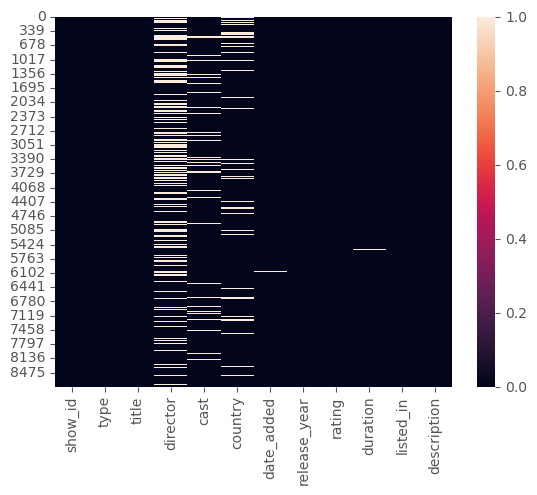

In [30]:
# Mostramos la gráfica de datos perdidos
# ==============================================================================
sns.heatmap(df.isnull())
plt.show

In [31]:
# Eliminamos los valores nulos
# ==============================================================================
df=df[df['rating'].notnull()]
df=df[df['date_added'].notnull()]

In [32]:
#Sustituimos lo NaN por el valor SIN INFORMACION
# ==============================================================================
df['director']  =  df['director'].fillna('not specified')
df['country']   =  df['country'].fillna('not specified')
df['cast']      =  df['cast'].fillna('not specified')

In [33]:
# Escribimos el código para crear la tabla resumen
# ==============================================================================
columnas=list(df.columns)
Cantidad= df[columnas].isnull().sum()
Porcentaje= df[columnas].isnull().sum()*100/len(df)
tipo=df[columnas].dtypes

Sumario=pd.DataFrame({'Cant. Valores Perdidos' : Cantidad,
                      '%Valores Perdidos' : round(Porcentaje,2),
                      'Tipo Variable' : tipo})
Sumario.sort_values('Cant. Valores Perdidos',ascending=False)

,Cant. Valores Perdidos,%Valores Perdidos,Tipo Variable
duration,3,0.03,object
show_id,0,0.00,object
type,0,0.00,object
title,0,0.00,object
director,0,0.00,object
cast,0,0.00,object
country,0,0.00,object
date_added,0,0.00,object
release_year,0,0.00,int64
rating,0,0.00,object


## LIMPIEZA y TRANSFORMACION DE DATOS

### 1. Eliminamos los datos inconsistentes

In [34]:
# Revisamos que existen valores que no corresponde a la variable rating
# ==============================================================================
df[df.rating.isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [35]:
# Eliminamos dichos valores
# ==============================================================================
df.drop([5541,5794,5813], axis=0, inplace=True)
df[df.rating.isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [36]:
# Eliminamos dichos valores
# ==============================================================================
df.shape

(8790, 12)

### 2. Realizamos el cambio de formato

In [37]:
# Cambiamos el formato de la variable release_year
# ==============================================================================
df['release_year'] = df['release_year'].astype(int)
df['release_year'] = df['release_year'].astype(str)

In [38]:
# Le damos formato de fecha a la variable date_added en caso exista error de 
# formato lo evitamos colocandolo en nulo
# ==============================================================================
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [39]:
# Nos quedamos con tadas las variable que cumplan con el formado de fecha
# ==============================================================================
df1 = df[df['date_added'].notnull()]
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,not specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,not specified,not specified,not specified,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
# Transformamos el formato datetime64[ns] a str
# ==============================================================================
df1['date_added'] = df1['date_added'].dt.strftime('%Y-%m-%d')
df1['date_added'] = df1['date_added'].astype(str)

In [41]:
# Revisamos el Resumen
# ==============================================================================
columnas=list(df1.columns)
Cantidad= df1[columnas].isnull().sum()
Porcentaje= df1[columnas].isnull().sum()*100/len(df)
tipo=df1[columnas].dtypes

Sumario=pd.DataFrame({'Cant. Valores Perdidos' : Cantidad,
                      '%Valores Perdidos' : round(Porcentaje,2),
                      'Tipo Variable' : tipo})
Sumario.sort_values('Cant. Valores Perdidos',ascending=False)

,Cant. Valores Perdidos,%Valores Perdidos,Tipo Variable
show_id,0,0.0,object
type,0,0.0,object
title,0,0.0,object
director,0,0.0,object
cast,0,0.0,object
country,0,0.0,object
date_added,0,0.0,object
release_year,0,0.0,object
rating,0,0.0,object
duration,0,0.0,object


In [42]:
# Dimensión del nuevo DataFrame
# ==============================================================================
df1.shape

(8702, 12)

### 3. Limpieza de caracteres especiales

In [43]:
import re

def limpiar_caracteres_especiales(cadena):
    # Definir la expresión regular para encontrar caracteres especiales excepto los mencionados
    patron = r'[^a-zA-Z0-9áéíóúüÜÁÉÍÓÚÜ\',¡¿!& ]'
    
    # Utilizar la función sub de la librería re para reemplazar los caracteres especiales por una cadena vacía
    cadena_limpia = re.sub(patron, '', cadena)
    
    return cadena_limpia

In [44]:
def limpiar_dataframe(df):
    # Aplicar la función limpiar_caracteres_especiales a todas las columnas del dataframe y reemplazar las columnas originales
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Verificar si la columna es de tipo string
            df[columna] = df[columna].apply(limpiar_caracteres_especiales)
    
    return df

In [45]:
df1 = limpiar_dataframe(df1)

In [46]:
df1[df1['show_id']=='s7410']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### 4. Realizamos la división de algunos campos

In [47]:
df2=df1[['director', 'cast', 'country','listed_in']]
df2

,director,cast,country,listed_in
0,Kirsten Johnson,not specified,United States,Documentaries
1,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,"Crime TV Shows, International TV Shows, TV Act..."
3,not specified,not specified,not specified,"Docuseries, Reality TV"
4,not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"Cult Movies, Dramas, Thrillers"
8803,not specified,not specified,not specified,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"Comedies, Horror Movies"
8805,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"Children & Family Movies, Comedies"


In [48]:
# Sacamos el número de variables que se aplicó la función
# ==============================================================================
nro_variables=df2.shape[1]
nro_variables

4

In [49]:
# Definir una función personalizada para separar los valores}
# ==============================================================================
def separar_valores(fila):
    valores = fila.split(',')
    return pd.Series(valores)

# Inicializar un diccionario para almacenar las nuevas columnas
# ==============================================================================
nuevas_columnas_dict = {}

# Iterar sobre las columnas y aplicar la función de separación
# ==============================================================================
for columna in df2.columns:
    nuevas_columnas = df2[columna].apply(separar_valores)
    nuevas_columnas_dict[columna] = nuevas_columnas

# Concatenar las nuevas columnas al DataFrame original
# ==============================================================================
df2 = pd.concat([df2] + list(nuevas_columnas_dict.values()), axis=1)

# Etiquetar las nuevas columnas utilizando un bucle
# ==============================================================================
nombres_nuevas_columnas = []
for columna in nuevas_columnas_dict:
    for i in range(len(nuevas_columnas_dict[columna].columns)):
        nombre = f'{columna}_nueva{i+1}'
        nombres_nuevas_columnas.append(nombre)

# Renombrar las nuevas columnas
# ==============================================================================
df2.columns = list(df2.columns[:nro_variables]) + nombres_nuevas_columnas

# Mostramos resultado
# ==============================================================================
df2.head()

,director,cast,country,listed_in,director_nueva1,director_nueva2,director_nueva3,director_nueva4,director_nueva5,director_nueva6,...,country_nueva6,country_nueva7,country_nueva8,country_nueva9,country_nueva10,country_nueva11,country_nueva12,listed_in_nueva1,listed_in_nueva2,listed_in_nueva3
0,Kirsten Johnson,not specified,United States,Documentaries,Kirsten Johnson,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentaries,NaN,NaN
1,not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"International TV Shows, TV Dramas, TV Mysteries",not specified,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International TV Shows,TV Dramas,TV Mysteries
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not specified,"Crime TV Shows, International TV Shows, TV Act...",Julien Leclercq,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crime TV Shows,International TV Shows,TV Action & Adventure
3,not specified,not specified,not specified,"Docuseries, Reality TV",not specified,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Docuseries,Reality TV,NaN
4,not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"International TV Shows, Romantic TV Shows, TV ...",not specified,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International TV Shows,Romantic TV Shows,TV Comedies


### 5. Obtener resultado final

In [50]:
df1.shape

(8702, 12)

In [51]:
df2.shape

(8702, 82)

In [52]:
columnas = ['director', 'cast', 'country','listed_in']

In [53]:
# Unir los dataframes mediante las columnas específicas
df_final = pd.merge(df1, df2, on=columnas)

# Eliminar duplicados, si es necesario
df_final = df_final.drop_duplicates()

In [54]:
df_final.shape

(8702, 90)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 11121
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           8702 non-null   object
 1   type              8702 non-null   object
 2   title             8702 non-null   object
 3   director          8702 non-null   object
 4   cast              8702 non-null   object
 5   country           8702 non-null   object
 6   date_added        8702 non-null   object
 7   release_year      8702 non-null   object
 8   rating            8702 non-null   object
 9   duration          8702 non-null   object
 10  listed_in         8702 non-null   object
 11  description       8702 non-null   object
 12  director_nueva1   8702 non-null   object
 13  director_nueva2   613 non-null    object
 14  director_nueva3   72 non-null     object
 15  director_nueva4   35 non-null     object
 16  director_nueva5   20 non-null     object
 17  director_nueva6   

## Exportar en Excel 

In [56]:
# Direccionamos nuestra ruta de trabajo
# ==============================================================================
Ruta="D:/Examenes de Postulación/Delfosti/Desarrollo/1. limpieza y transformación"
os.chdir(Ruta)
os.getcwd()

'D:\\Examenes de Postulación\\Delfosti\\Desarrollo\\1. limpieza y transformación'

In [57]:
# archivo de Excel
archivo = 'DataFinal.xlsx'  # Reemplaza con la ruta deseada

# Exportar el DataFrame a un archivo de Excel en la ruta especificada
df_final.to_excel(archivo, index=False)  # El parámetro index=False evita que se añada la columna de índice al archivo Excel

## ALCANCE DEL PROYECTO
 * Análisis de Normalización de la data
 * Contruir de la Base de Datos
 * Diagrama  de Flujo en SQL
 * Migración la información al SQL

In [58]:
from IPython.display import Image
%matplotlib inline

In [60]:
# Direccionamos nuestra ruta de trabajo
# ==============================================================================
Ruta="D:/Examenes de Postulación/Delfosti/Desarrollo/6. Imagenes"
os.chdir(Ruta)
os.getcwd()

'D:\\Examenes de Postulación\\Delfosti\\Desarrollo\\6. Imagenes'

### 1. Normalización

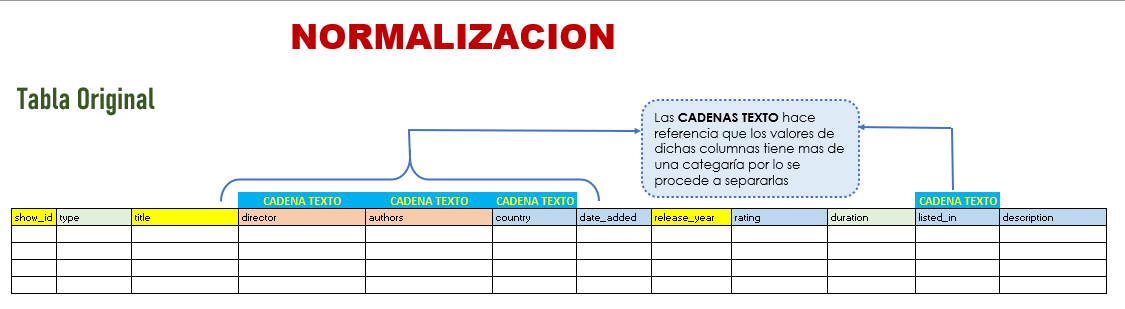

In [61]:
Imagen="DataOriginal.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=1800)

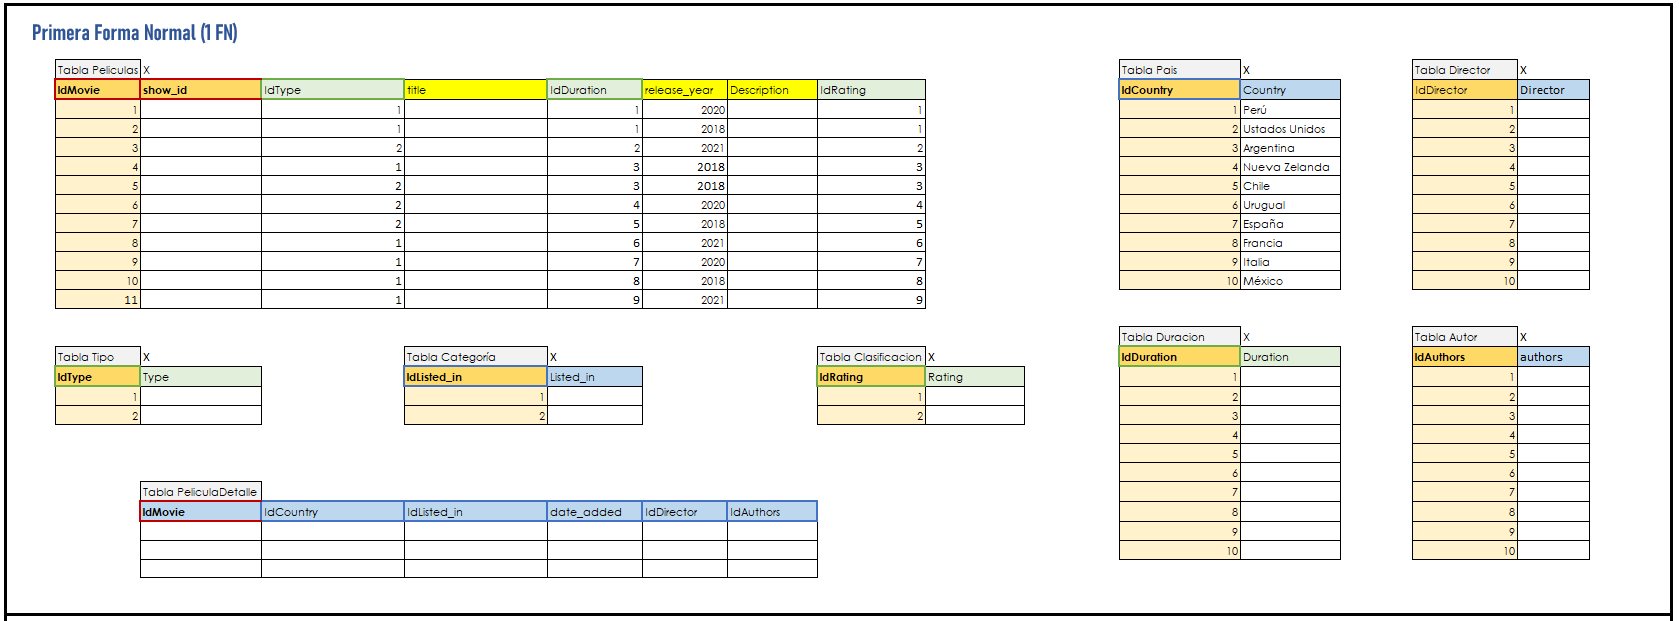

In [62]:
Imagen="1_FN.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=1800)


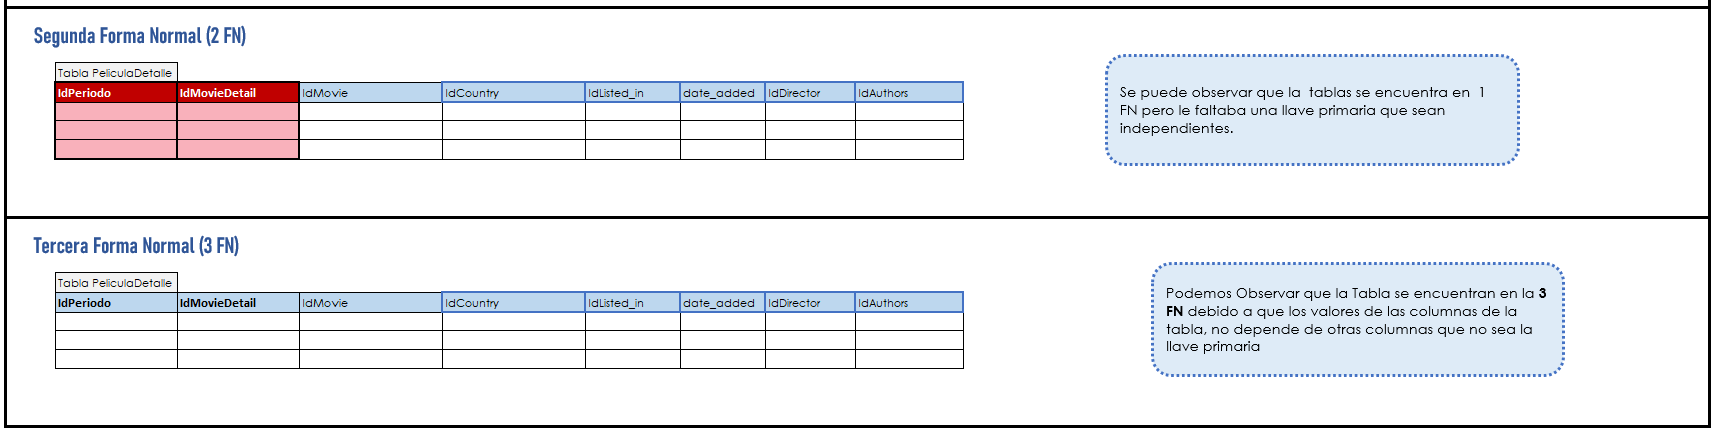

In [63]:
Imagen="2_3_FN.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=1800)

### 2. Contruir de la Base de Datos

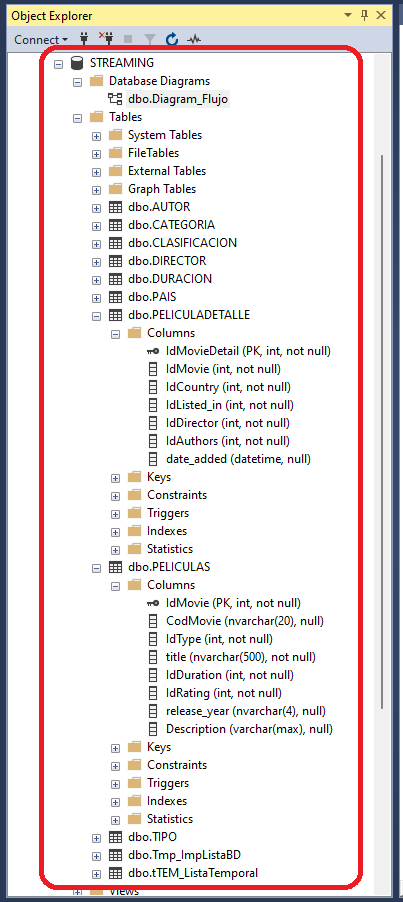

In [64]:
Imagen="Construcion DB.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=500)

### 3. Diagrama de Flujo en SQL

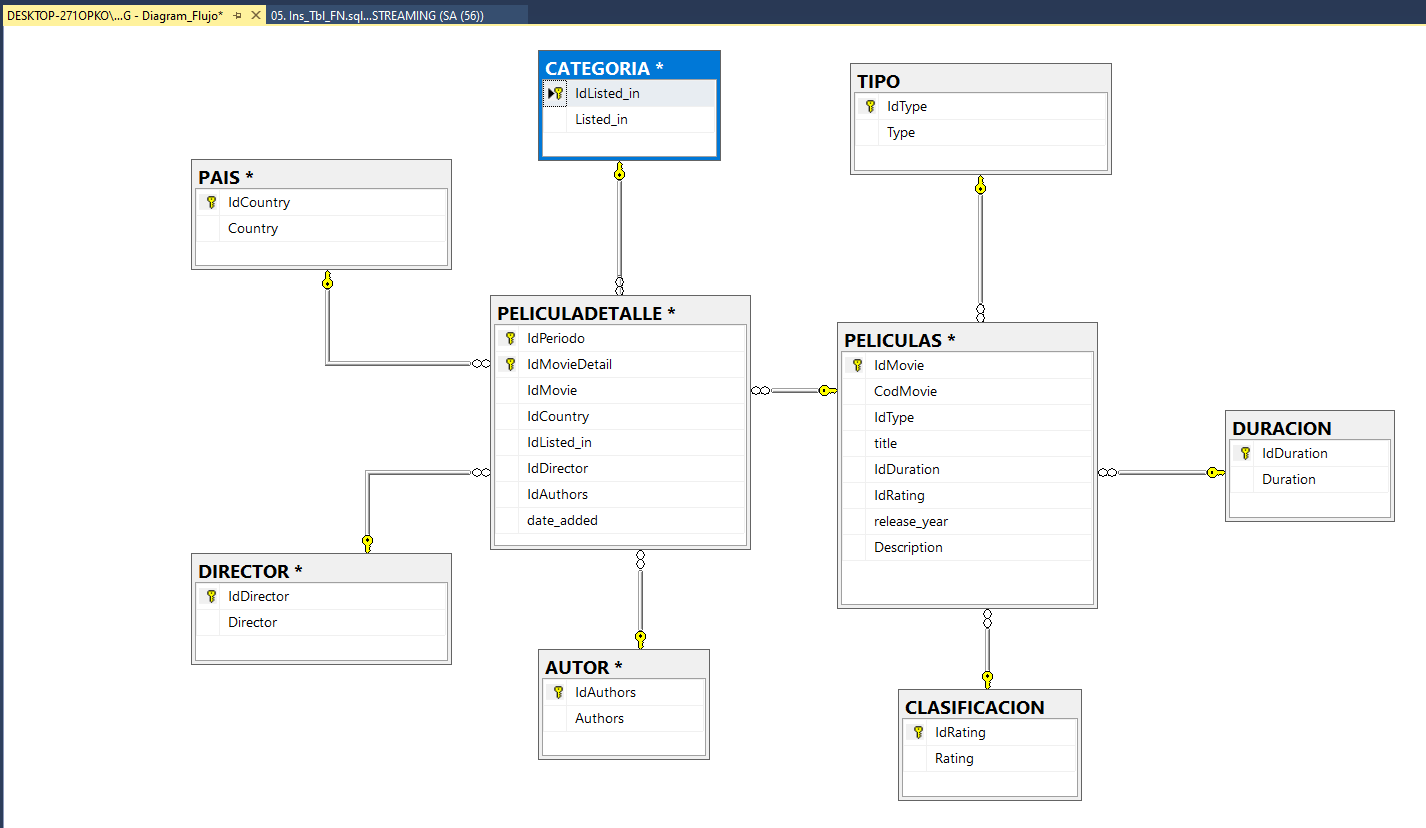

In [65]:
Imagen="Estructura_SQL.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=1800)

### 4. Power Bi

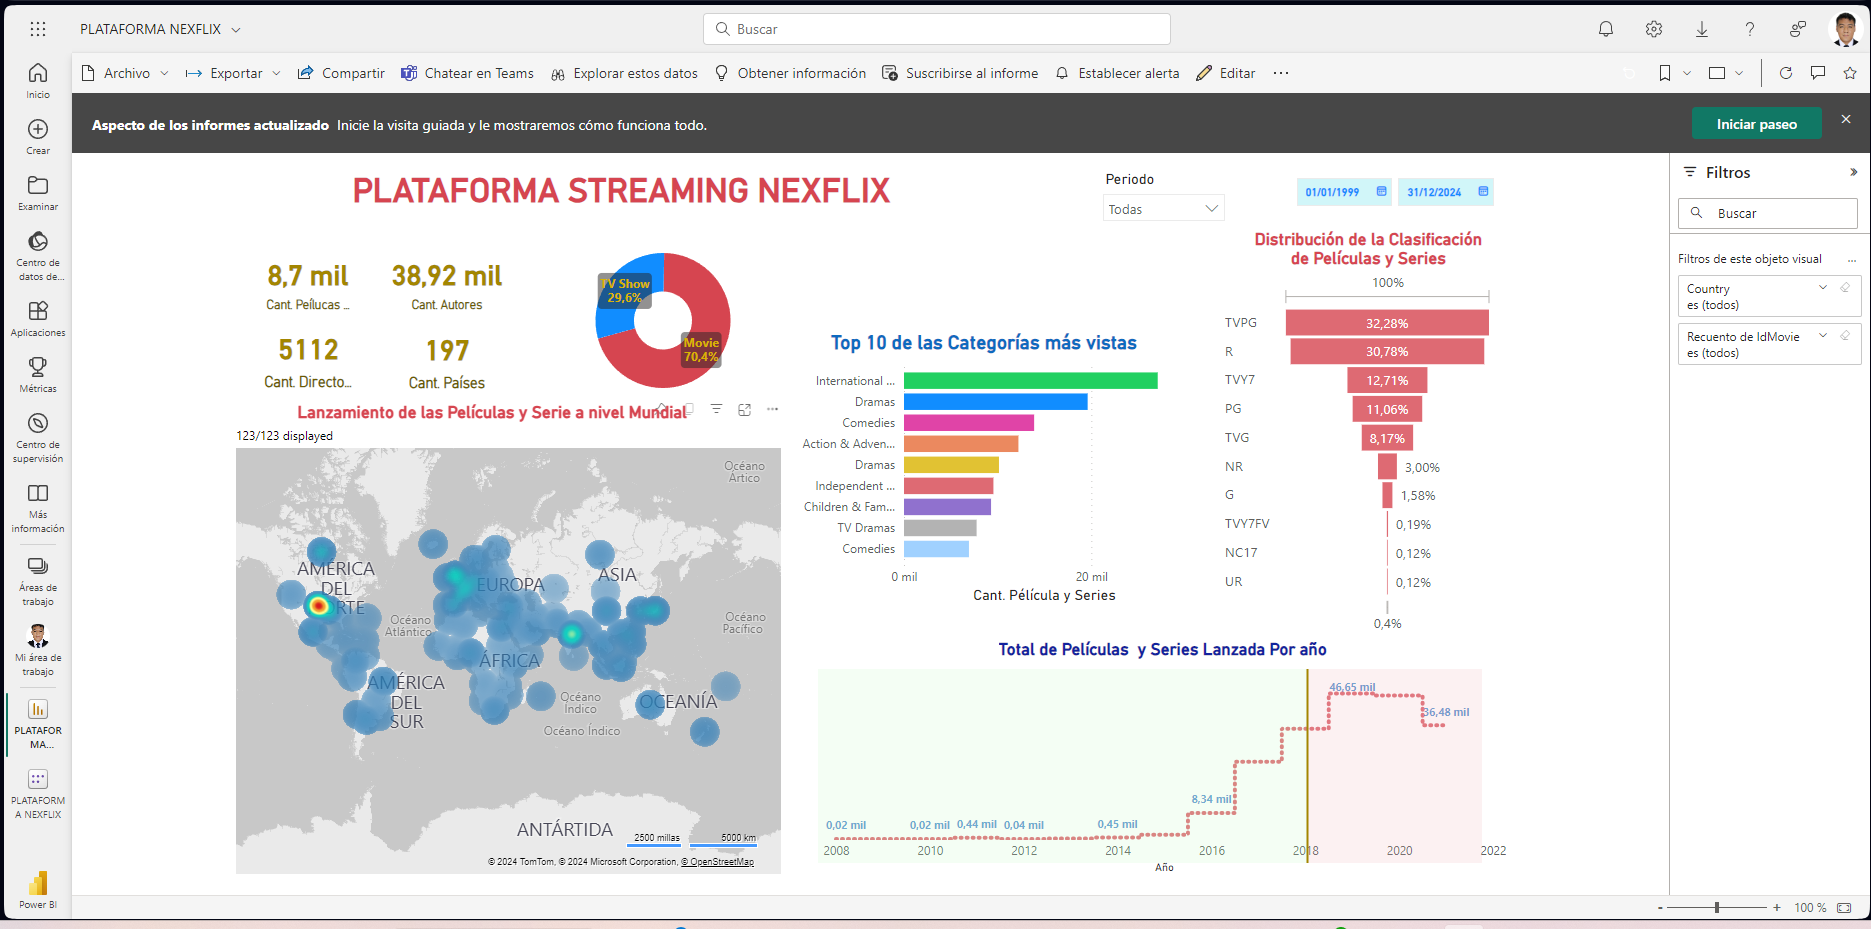

In [66]:
Imagen="PowerBi.png"
Direcrotio=Ruta+"/"+Imagen
Image(filename=Imagen, width=1800)